In [1]:
import re
import sys

import time
import datetime

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
# Loading the data
df = pd.read_csv('Top 10000 IMDb movies.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        9999 non-null   int64  
 1   Movie_Name        9999 non-null   object 
 2   Year_of_Release   9999 non-null   int64  
 3   C_Rating          9645 non-null   object 
 4   Watch_Time_(min)  9999 non-null   int64  
 5   Genre             9999 non-null   object 
 6   Movie_Rating      9999 non-null   float64
 7   Metascore         7999 non-null   float64
 8   Votes             9999 non-null   int64  
 9   Gross_($M)        7203 non-null   float64
 10  Description       9999 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 859.4+ KB


In [3]:
df.head(20)

,Unnamed: 0,Movie_Name,Year_of_Release,C_Rating,Watch_Time_(min),Genre,Movie_Rating,Metascore,Votes,Gross_($M),Description
0,0,The Shawshank Redemption,1994,R,142,Drama,9.3,82.0,2735235,28.34,"Over the course of several years, two convicts..."
1,1,The Godfather,1972,R,175,"Crime, Drama",9.2,100.0,1902109,134.97,The aging patriarch of an organized crime dyna...
2,2,The Chaos Class,1975,NaN,87,"Comedy, Drama",9.2,NaN,41631,NaN,"Lazy, uneducated students share a very close b..."
3,3,Daman,2022,NaN,121,"Adventure, Drama",9.1,NaN,13199,NaN,"The film is set in 2015. Sid, is a young docto..."
4,4,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama",9.0,84.0,2708419,534.86,When the menace known as the Joker wreaks havo...
5,5,Schindler's List,1993,R,195,"Biography, Drama, History",9.0,95.0,1380843,96.90,"In German-occupied Poland during World War II,..."
6,6,The Lord of the Rings: The Return of the King,2003,PG-13,201,"Action, Adventure, Drama",9.0,94.0,1881383,377.85,Gandalf and Aragorn lead the World of Men agai...
7,7,12 Angry Men,1957,Approved,96,"Crime, Drama",9.0,97.0,809518,4.36,The jury in a New York City murder trial is fr...
8,8,The Godfather Part II,1974,R,202,"Crime, Drama",9.0,90.0,1296679,57.30,The early life and career of Vito Corleone in ...
9,9,Mirror Game,2016,NaN,147,"Crime, Mystery, Thriller",9.0,NaN,27497,NaN,Ayna is an actor and the prison is his stage. ...


In [4]:
df.isnull().sum()

Unnamed: 0             0
Movie_Name             0
Year_of_Release        0
C_Rating             354
Watch_Time_(min)       0
Genre                  0
Movie_Rating           0
Metascore           2000
Votes                  0
Gross_($M)          2796
Description            0
dtype: int64

<AxesSubplot:xlabel='Movie_Rating', ylabel='Votes'>

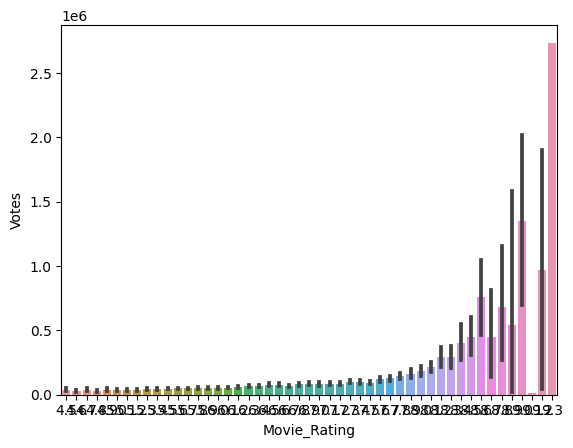

In [5]:
sns.barplot(x='Movie_Rating', y='Votes', data=df)

c:\Users\namtr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


<AxesSubplot:xlabel='Movie_Rating', ylabel='Gross_($M)'>

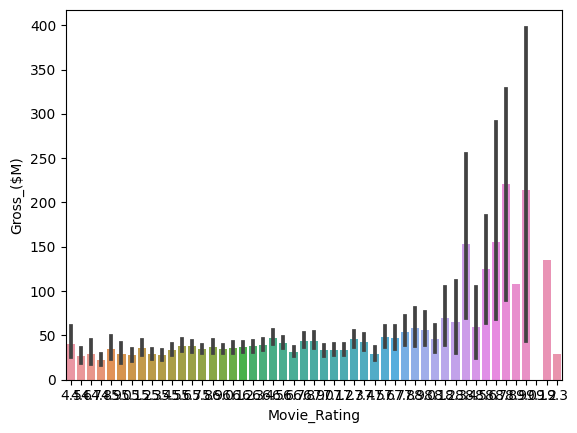

In [6]:
sns.barplot(x='Movie_Rating', y='Gross_($M)', data=df)

In [7]:
df.drop_duplicates(inplace=True)

Missing Value Imputation

In [8]:
df['Metascore'] = df['Metascore'].fillna(0)

In [9]:
df['Gross_($M)'] = df['Gross_($M)'].fillna(df['Gross_($M)'].median())

In [10]:
# #Replacing the content rating with Value R as it has highest frequency
# df["C_Rating"] = df["C_Rating"].fillna("R")

In [11]:
df.dropna(axis=0,subset=['C_Rating'],inplace=True)

In [12]:
df.shape

(9645, 11)

Label Encoding

In [13]:
le = preprocessing.LabelEncoder()
df['Movie_Name'] = le.fit_transform(df['Movie_Name'])

In [14]:
le = preprocessing.LabelEncoder()
df['C_Rating'] = le.fit_transform(df['C_Rating'])

In [15]:
le = preprocessing.LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])

In [16]:
le = preprocessing.LabelEncoder()
df['Description'] = le.fit_transform(df['Description'])

Outliers

In [17]:
df_outliers = df.copy()

In [18]:
uppper_boundary=df_outliers['Year_of_Release'].mean() + 3* df_outliers['Year_of_Release'].std()
lower_boundary=df_outliers['Year_of_Release'].mean() - 3* df_outliers['Year_of_Release'].std()
print(lower_boundary), print(uppper_boundary)

df_outliers.loc[df_outliers['Year_of_Release']>=uppper_boundary, 'Year_of_Release']=uppper_boundary
df_outliers.loc[df_outliers['Year_of_Release']<=lower_boundary, 'Year_of_Release']=lower_boundary

1945.508661907522
2056.44737749113


In [19]:
uppper_boundary=df_outliers['Watch_Time_(min)'].mean() + 3* df_outliers['Watch_Time_(min)'].std()
lower_boundary=df_outliers['Watch_Time_(min)'].mean() - 3* df_outliers['Watch_Time_(min)'].std()
print(lower_boundary), print(uppper_boundary)

df_outliers.loc[df_outliers['Watch_Time_(min)']>=uppper_boundary, 'Watch_Time_(min)']=uppper_boundary
df_outliers.loc[df_outliers['Watch_Time_(min)']<=lower_boundary, 'Watch_Time_(min)']=lower_boundary

44.90820397588479
175.09905367056416


Feature selection

In [20]:
features = ['Movie_Name','Year_of_Release', 'C_Rating', 'Watch_Time_(min)', 'Genre', 'Metascore', 'Votes', 'Gross_($M)', 'Description']
X = df_outliers[features]
y = df_outliers['Movie_Rating']

In [21]:
from sklearn.feature_selection import RFECV
estimator = RandomForestRegressor()
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X, y)
selector.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [22]:
selector.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1])

In [23]:
df_outliers.head(20)

,Unnamed: 0,Movie_Name,Year_of_Release,C_Rating,Watch_Time_(min),Genre,Movie_Rating,Metascore,Votes,Gross_($M),Description
0,0,8123,1994.0,16,142.000000,302,9.3,82.0,2735235,28.34,7089
1,1,7231,1972.0,16,175.000000,273,9.2,100.0,1902109,134.97,7797
4,4,6983,2008.0,14,152.000000,35,9.0,84.0,2708419,534.86,9439
5,5,5814,1993.0,16,175.099054,187,9.0,95.0,1380843,96.90,6020
6,6,7623,2003.0,14,175.099054,5,9.0,94.0,1881383,377.85,5707
7,7,16,1957.0,3,96.000000,273,9.0,97.0,809518,4.36,7959
8,8,7232,1974.0,16,175.099054,273,9.0,90.0,1296679,57.30,7876
10,10,5364,1994.0,16,154.000000,273,8.9,95.0,2101929,107.93,8026
14,14,3421,2010.0,14,148.000000,12,8.8,74.0,2404179,292.58,2876
15,15,2461,1999.0,16,139.000000,302,8.8,66.0,2177808,37.03,4474


### DATA VISUALIZATION

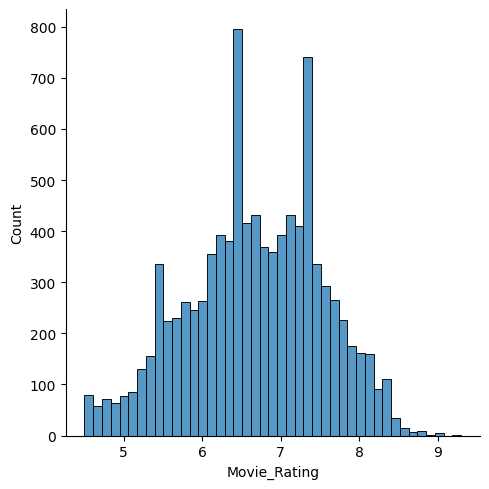

In [24]:
sns.displot(df, x="Movie_Rating")

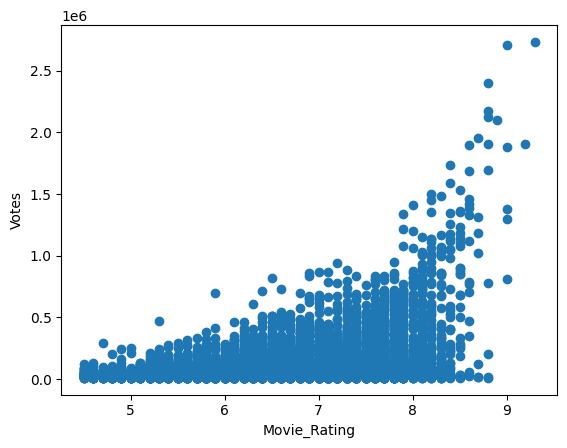

In [25]:
plt.scatter(df['Movie_Rating'], df['Votes'])
plt.xlabel("Movie_Rating")
plt.ylabel("Votes")
plt.show()

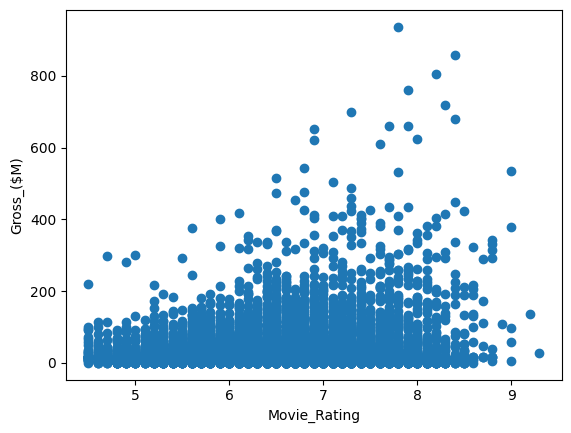

In [26]:
plt.scatter(df['Movie_Rating'], df['Gross_($M)'])
plt.xlabel("Movie_Rating")
plt.ylabel("Gross_($M)")
plt.show()

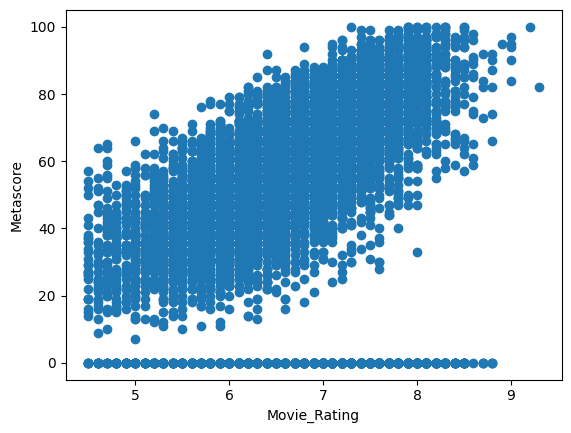

In [27]:
plt.scatter(df['Movie_Rating'], df['Metascore'])
plt.xlabel("Movie_Rating")
plt.ylabel("Metascore")
plt.show()

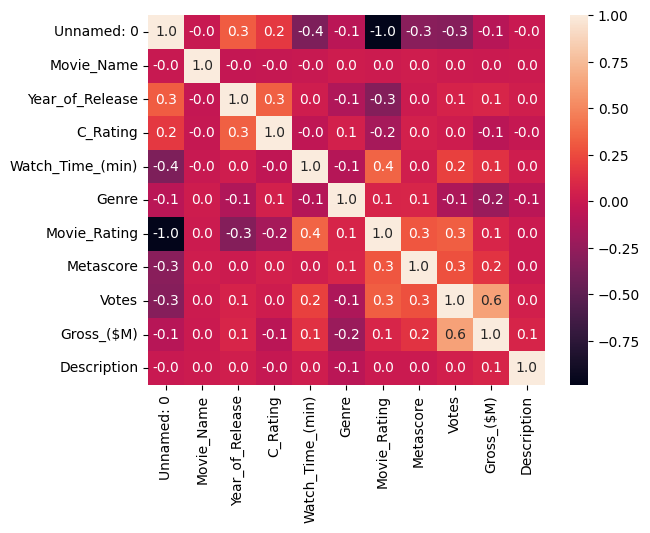

In [28]:
sns.heatmap(df.corr(), annot=True ,fmt=".1f")
plt.show()

### Build models

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 52)

In [30]:
from sklearn.pipeline import make_pipeline

In [31]:
# create a pipeline object
pipe = make_pipeline(
RandomForestRegressor()
)
pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))

0.6633115830289624


In [32]:
# create a pipeline object
pipe = make_pipeline(
KNeighborsRegressor()
)
pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))

-0.08027863834968252


Feature Scaling

In [33]:
from sklearn.preprocessing import RobustScaler
# create a pipeline object
pipe = make_pipeline(
RobustScaler(),
RandomForestRegressor()
)

pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))

0.6614092838624068


In [34]:
# create a pipeline object
pipe = make_pipeline(
RobustScaler(),
KNeighborsRegressor()
)
pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))

0.5799251654609164


Metrics

In [35]:
pipe = make_pipeline(
RobustScaler(),
RandomForestRegressor()
)
pipe.fit(X_train, y_train)
predictions = pipe.predict(X_test)

In [36]:
'Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions)

('Mean Absolute Error:', 0.38143780234968894)

In [37]:
'Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions))

('Root Mean Squared Error:', 0.4993568949853942)

In [38]:
'R2 Score:', metrics.r2_score(y_test, predictions)

('R2 Score:', 0.6610590447435003)

In [39]:
pipe = make_pipeline(
RobustScaler(),
KNeighborsRegressor()
)
pipe.fit(X_train, y_train)
predictions = pipe.predict(X_test)

In [40]:
'Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions)

('Mean Absolute Error:', 0.42967519004837595)

In [41]:
'Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions))

('Root Mean Squared Error:', 0.5559200769870033)

In [42]:
'R2 Score:', metrics.r2_score(y_test, predictions)

('R2 Score:', 0.5799251654609164)